In [54]:
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from tensorflow.keras.metrics import RootMeanSquaredError

In [55]:
microsoft_stock = pd.read_csv("//content//MicrosoftStock.csv", usecols=lambda col: col != 'index')

In [56]:
microsoft_stock.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [57]:
microsoft_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [58]:
microsoft_stock.shape

(1259, 7)

In [59]:
microsoft_stock.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,51.026394,51.436007,50.630397,51.063081,3.386946e+07
std,14.859387,14.930144,14.774630,14.852117,1.958979e+07
min,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,95.140000,96.070000,93.720000,95.010000,2.483542e+08


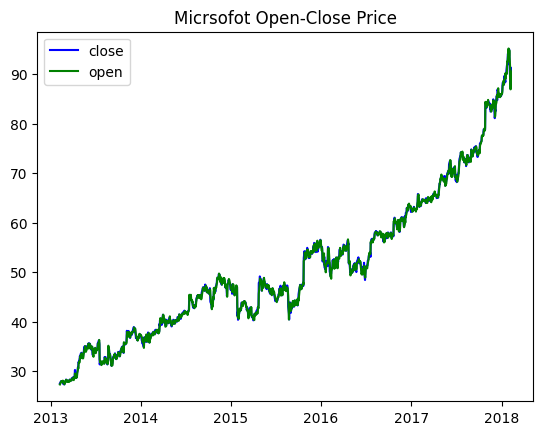

In [60]:
microsoft_stock['date']= pd.to_datetime(microsoft_stock['date'])
plt.plot(microsoft_stock['date'],microsoft_stock['close'], label='close', color='blue')
plt.plot(microsoft_stock['date'],microsoft_stock['open'], label='open', color='green')
plt.title('Micrsofot Open-Close Price')
plt.legend()


<ipython-input-61-90c83ccf60f9>:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


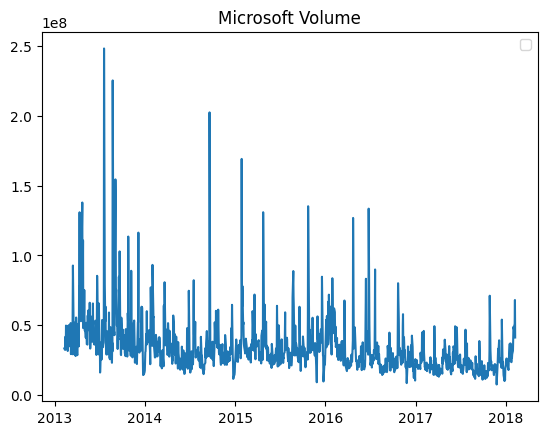

In [61]:
plt.plot(microsoft_stock['date'],microsoft_stock['volume'])
plt.title('Microsoft Volume')
plt.legend()

<Axes: >

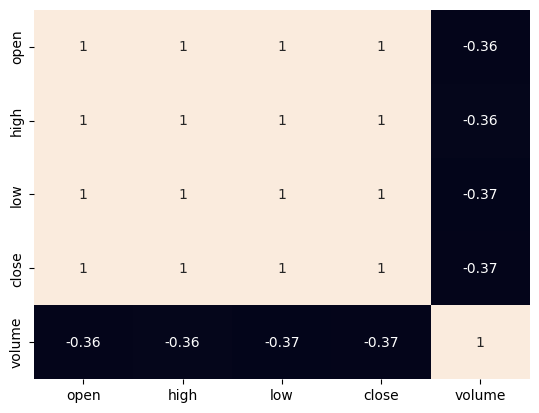

In [62]:
sns.heatmap(microsoft_stock.select_dtypes(include=np.number).corr(), annot=True, cbar=False)

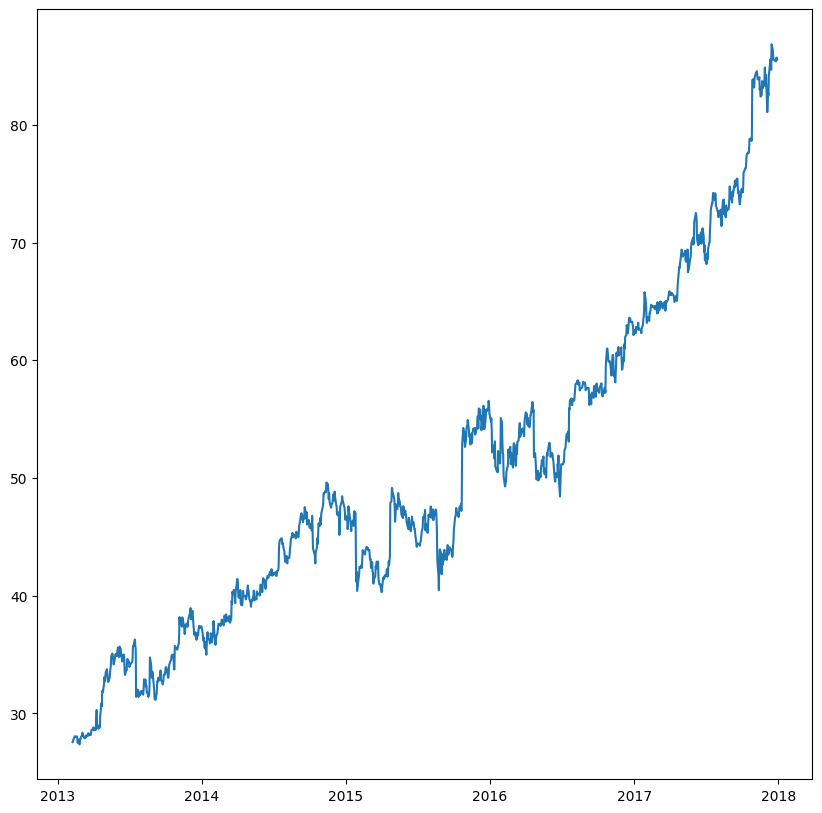

In [63]:
microsoft_stock['date']= pd.to_datetime(microsoft_stock['date'])
prediction=microsoft_stock.loc[(microsoft_stock['date'] >datetime(2013,1,1))&(microsoft_stock['date']<datetime(2018,1,1))]
plt.figure(figsize=(10,10))
plt.plot(prediction['date'], prediction['close'])

In [64]:
msft_close=microsoft_stock.filter(['close'])
dataset=msft_close.values
training =int(np.ceil(len(dataset)*.95))


# scale the data
ss = StandardScaler()
ss = ss.fit_transform(dataset)

train_data = ss[0:int(training), :]

x_train = []
y_train = []

# considering 60 as the batch size,
# create the X_train and y_train
for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(x_train,
					(x_train.shape[0],
					x_train.shape[1], 1))



In [65]:
model=keras.models.Sequential()
model.add(keras.layers.LSTM(units=64, return_sequences=True, input_shape= (x_train.shape[1],1)) )
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(units=128))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units=1))

print(model.summary())


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [66]:
from keras.metrics import RootMeanSquaredError
model.compile(optimizer='adam', loss='mae', metrics=[RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs=20)


Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.2961 - root_mean_squared_error: 0.4161
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 0.1121 - root_mean_squared_error: 0.1539
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - loss: 0.1066 - root_mean_squared_error: 0.1444
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0933 - root_mean_squared_error: 0.1253
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0898 - root_mean_squared_error: 0.1160
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0883 - root_mean_squared_error: 0.1189
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0896 - root_mean_squared_error: 0.1194
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0837 - root_mean_squared_error: 0.1121
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0857 - root_mean_squared_error: 0.1159
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0908 - root_mean_squared_error: 0.12

In [68]:
testing= ss[training-60: , :]
x_test= []
y_test= dataset[training:, :]
for i in range(60, len(testing)):
  x_test.append(testing[i-60:i, 0])

x_test= np.array(x_test)
X_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

pred=model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step


<ipython-input-69-0381da086f17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']= pred


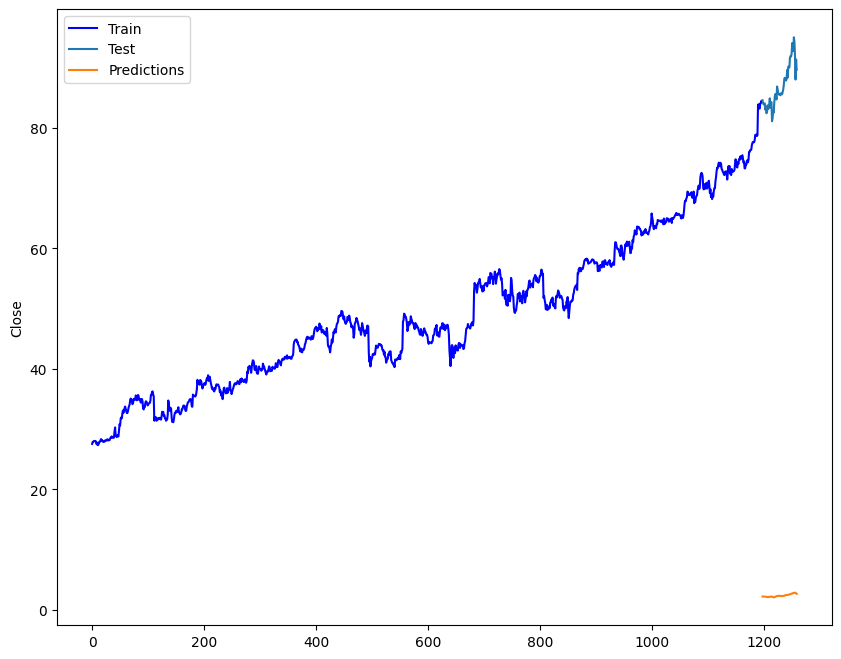

In [69]:
train=microsoft_stock[:training]
test= microsoft_stock[training:]
test['Predictions']= pred
plt.figure(figsize=(10,8))
plt.plot(train['close'], c="b")
plt.plot(test[['close', 'Predictions']])
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])
plt.show()